### Plot No. 1: Raw data of one BHE
from July 1., 2018 to July 31, 2023 (complete data period)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
from datetime import datetime as dt
from dateutil.relativedelta import *
import pickle
from functools import reduce

In [5]:
import sys 
sys.path.append('D:/sciebo/Montreal/Code/')
sys.path.append('D:/sciebo/Montreal/Code/ERC_data_helpers/')
import ERC_data_helpers as ERC
ERC.plot.ERC_Management().set_plot_params()
fig_width = 6.3

In [13]:
## load the raw data for the entire time period for one BHE and put it togehter
#BHE = 13
#BHE_data =pd.DataFrame() 

#time_format = "%Y-%m-%d %H:%M:%S"
#time_start_global = dt.strptime("2018-07-01 00:00:00",time_format)
#time_end_global=dt.strptime("2019-07-30 23:59:59",time_format)
#time_end_global=dt.strptime("2023-07-31 23:59:59",time_format)
#timeStep = relativedelta(months=+1)  
#time_start=time_start_global

#while time_start <= time_end_global:
#    loadname=f"data/raw_30s/ERC_data_raw_{time_start.year}_{time_start.month:02d}.csv"
#    data = pd.read_csv(loadname)
#    data.index = pd.to_datetime(data['Time'], utc=True)
#    data.index = data.index.tz_localize(None)
#    data_subset = data[[f'Probe_{BHE:02d}_T_in', f'Probe_{BHE:02d}_T_out', f'Probe_{BHE:02d}_V_dot']]
#    BHE_data = pd.concat((BHE_data, data_subset))    
#    time_start+=timeStep   
#BHE_data = BHE_data.loc[time_start_global:time_end_global]

In [ ]:
from helpers import load_data
BHE = 16
BHE_data = load_data.load_raw_data("2018-07-01 00:00:00", "2019-07-30 23:59:59", BHEs = BHE)

In [9]:
colordict = {'RC': '#1F862F', 'Shem': '#EC6676',
'Hyb': '#9D3B74', 'Gfunc': '#CDB93D', 
'Tin_M': '#4474A2', 'Tout_M': '#70CAE6', 'Vdot': 
'#BABABA'}

In [10]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.transforms import ScaledTranslation

Text(0.5, 1.0, 'Raw data of BHE 16')

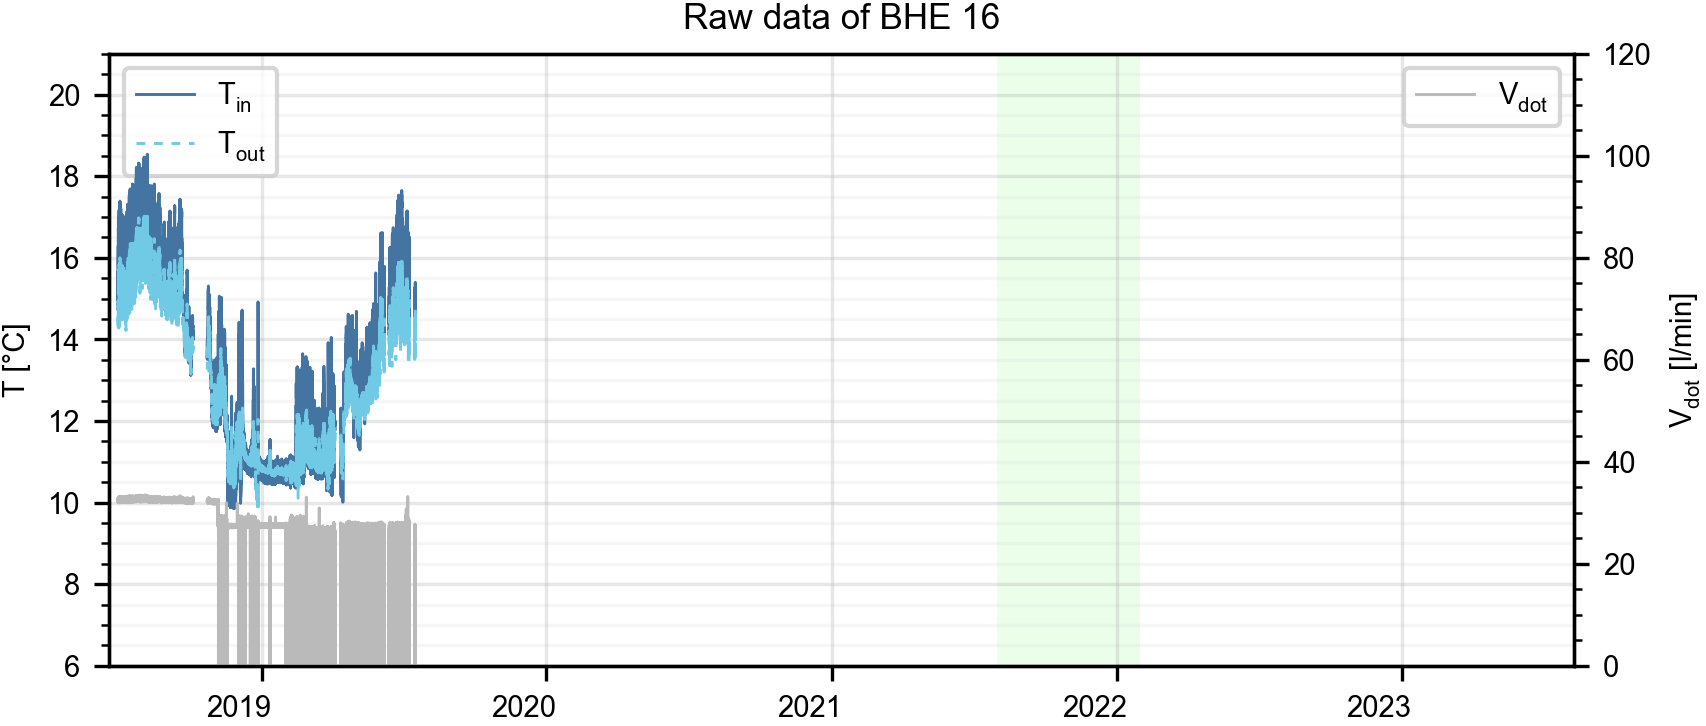

In [11]:
fig, ax = plt.subplots(1,1,figsize=(fig_width,3), dpi=300)

ax2 = ax.twinx()
BHE_data.plot(ax=ax2, y=f'Probe_{BHE:02d}_V_dot', color=colordict.get('Vdot'), linewidth=.7, x_compat=True, label='$\mathregular{V_{dot}}$',zorder=-10, legend=False)#style = '-.', dashes=(3, 5, 1, 5, 1, 5), 
BHE_data.plot(ax=ax, y=f'Probe_{BHE:02d}_T_in', color=colordict.get('Tin_M'),linewidth=.7, x_compat=True, label='$\mathregular{T_{in}}$',zorder=10, legend=False)#, alpha=.6
BHE_data.plot(ax=ax, y=f'Probe_{BHE:02d}_T_out', color=colordict.get('Tout_M'), style='--', dashes=(3,3), linewidth=.7,x_compat=True, label='$\mathregular{T_{out}}$',zorder=11, legend=False)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

## Wenn wir MPC Perioden wissen
ax.axvspan('2021-08-01', '2022-01-31', facecolor='palegreen', edgecolor='none', alpha=.2, label='Optmizized operation')


ax2.set_ylim(0,120)
ax2.set_ylabel('$\mathregular{V_{dot}}$ [l/min]')

ax.grid(alpha=.3, which='major')
ax.grid(alpha=.1, which='minor')
ax.set_ylabel('T [°C]')
ax.set_xlabel('')
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Label locations transformieren, ist sonst nach links versetzt
#resource: https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html
dx, dy = 10, 0
offset = ScaledTranslation(dx / fig.dpi, dy / fig.dpi, fig.dpi_scale_trans)
for label in ax.get_xticklabels():
        label.set_transform(label.get_transform() + offset)

for label in ax.get_xticklabels():
        label.set_rotation(0)

ax.set_ylim(6,21)
ax.set_xlim("2018-06-20 00:00:00", "2023-08-10 00:00:00")

ax.set_title(f'Raw data of BHE {BHE:02d}')
#fig.savefig(f'2a1_full_period_{BHE:02d}.pdf', bbox_inches='tight')